In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix

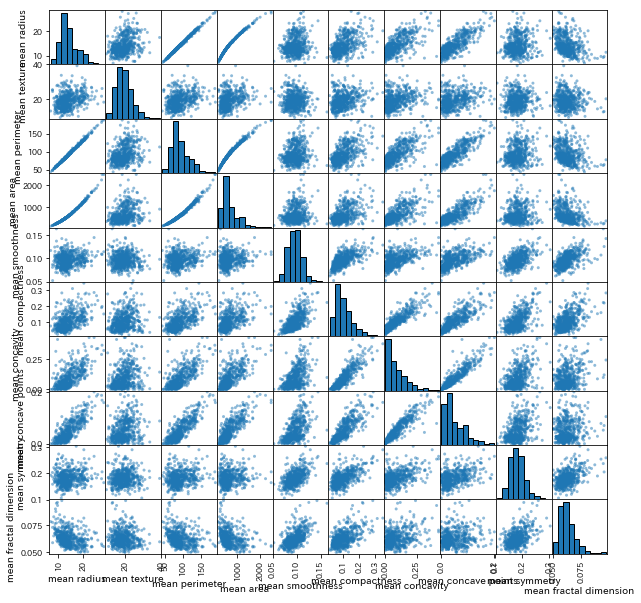

In [5]:
df = pd.DataFrame(data.data[:, 0:10], 
                  columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10,10));

In [6]:
import seaborn as sns
sns.set_style('darkgrid')

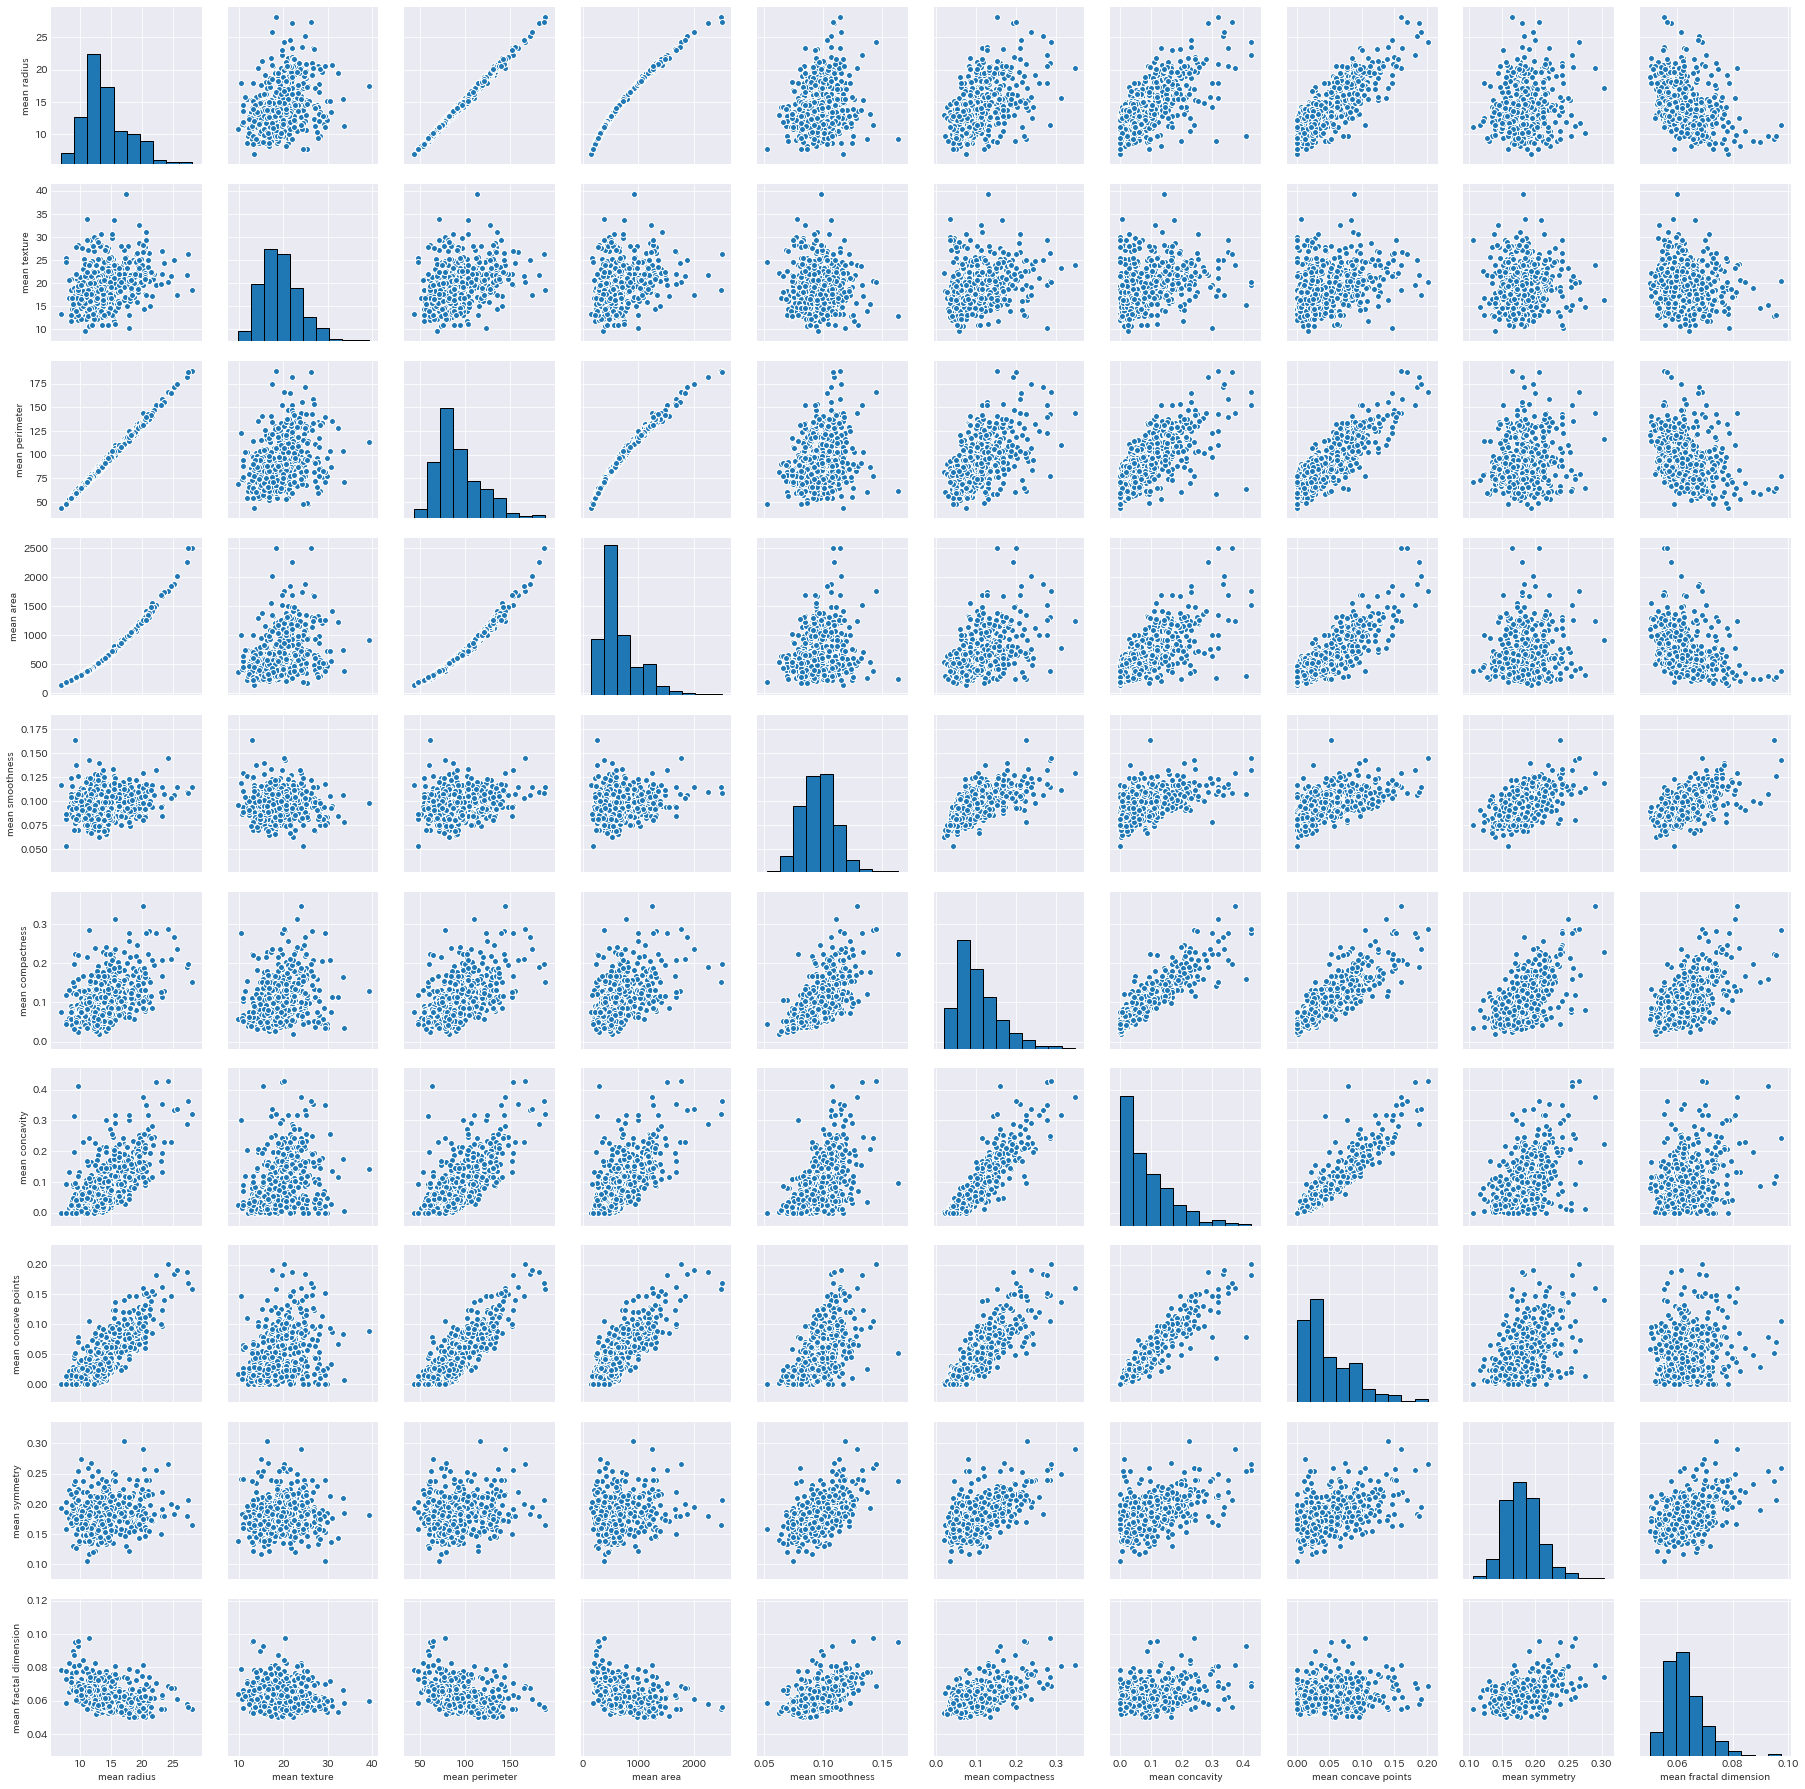

In [7]:
sns.pairplot(df)

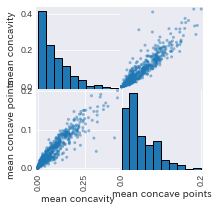

In [8]:
df = pd.DataFrame(data.data[:, 6:8],
                  columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3));

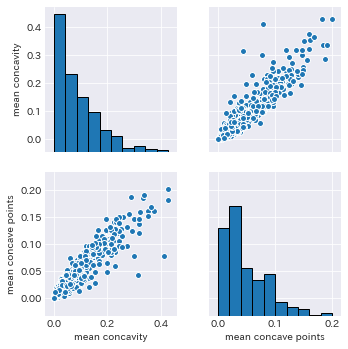

In [9]:
sns.pairplot(df)

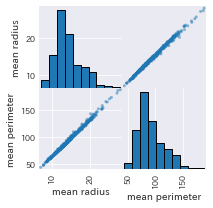

In [10]:
df = pd.DataFrame(data.data[:, [0,2]],
                  columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3));

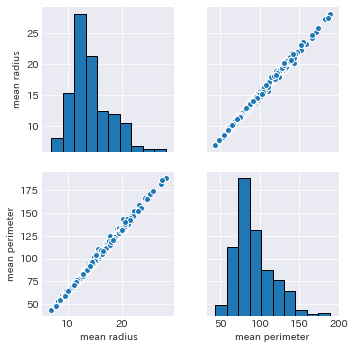

In [11]:
sns.pairplot(df)

In [12]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [13]:
X.shape, y.shape

((569, 2), (569,))

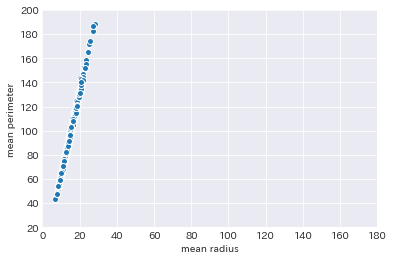

In [14]:
plt.scatter(X[:, 0], X[:, 1], edgecolor='white')
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_new = pca.transform(X) # 主成分方向に変換し,分散が最大なもの(第一主成分、第二主成分,...)から並べたデータ行列を返す。

(-60, 120)

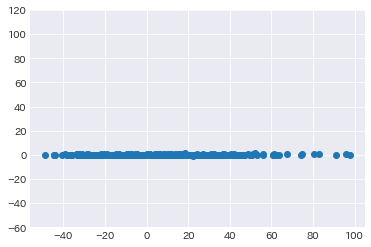

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

In [20]:
X

array([[  17.99,  122.8 ],
       [  20.57,  132.9 ],
       [  19.69,  130.  ],
       ..., 
       [  16.6 ,  108.3 ],
       [  20.6 ,  140.1 ],
       [   7.76,   47.92]])

In [21]:
X_new

array([[  3.10663327e+01,   5.93288220e-01],
       [  4.14317382e+01,  -5.13403959e-01],
       [  3.84355928e+01,  -5.78684115e-02],
       ..., 
       [  1.65167519e+01,  -1.07995749e-01],
       [  4.85617910e+01,   4.88218829e-01],
       [ -4.45068499e+01,  -7.86046551e-03]])

In [22]:
pca.explained_variance_ # それぞれでの次元についての分散

array([  6.02807278e+02,   5.21213668e-02])

In [23]:
pca.explained_variance_ / pca.explained_variance_.sum() # 分散の寄与率

array([  9.99913543e-01,   8.64569199e-05])

In [24]:
pca.explained_variance_ratio_

array([  9.99913543e-01,   8.64569199e-05])

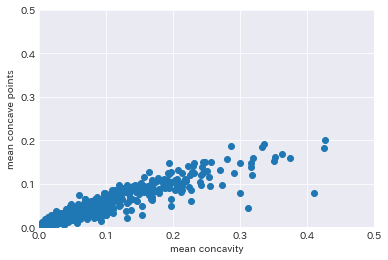

In [25]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

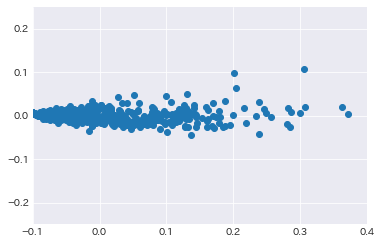

In [26]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [27]:
pca.explained_variance_

array([ 0.00767254,  0.00018837])

In [28]:
pca.explained_variance_ratio_ # 寄与率

array([ 0.97603731,  0.02396269])

In [29]:
# eigで検算
m = X.mean(axis=0)

In [30]:
Xp = (X - m) # 中心化

In [31]:
C = Xp.transpose().dot(Xp) # C は　共分散行列のN(もしくはN-1)倍

In [32]:
w, v = np.linalg.eig(C)  # 固有値と, 固有ベクトルを並べた行列を返す

In [33]:
w  # 固有値 eigenvalue

array([ 4.3580028 ,  0.10699332])

In [34]:
w / w.sum() # 寄与率  確かにpcaで求めた寄与率と等しくなる。

array([ 0.97603731,  0.02396269])

In [35]:
print(np.unique(y_train, return_counts=True)[1] / y_train.size)
np.unique(y_test, return_counts=True)[1] / y_test.size 

NameError: name 'y_train' is not defined

In [36]:
# data全体でやる

X = data.data
y = data.target
pca.fit(X)
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [37]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([  9.82386859e-01,   1.57471181e-02,   1.64828450e-03,
         1.18913740e-04,   8.72175312e-05,   6.38084588e-06,
         3.81084943e-06,   8.31035598e-07,   3.15982415e-07,
         1.72560871e-07,   6.32723960e-08,   1.56923795e-08,
         6.53434636e-09,   3.98460072e-09,   2.59619784e-09,
         1.36155484e-09,   5.96909942e-10,   4.43829849e-10,
         3.93647796e-10,   3.31692184e-10,   1.57841598e-10,
         1.17232601e-10,   6.29845580e-11,   5.00320102e-11,
         3.43112293e-11,   2.55666513e-11,   7.30239006e-12,
         5.83125200e-12,   3.80837406e-12,   9.45671339e-13])

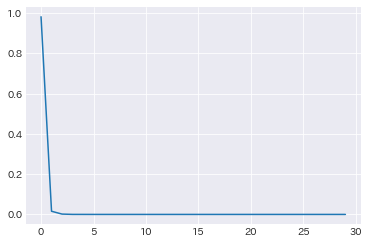

In [38]:
plt.plot(pca.explained_variance_ratio_)  # explained_variance_ratio_ は分散を大きい順(共分散行列の固有値の大きい順)に並べたものの寄与率 を返す。
pca.explained_variance_ratio_ 

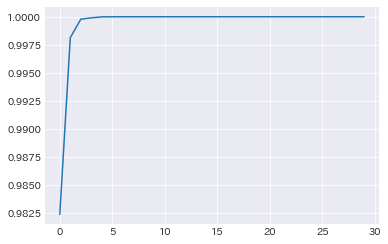

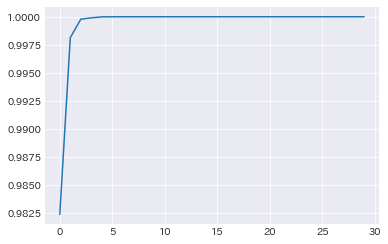

array([ 0.98238686,  0.99813398,  0.99978226,  0.99990118,  0.99998839,
        0.99999477,  0.99999858,  0.99999942,  0.99999973,  0.9999999 ,
        0.99999997,  0.99999998,  0.99999999,  0.99999999,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [39]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_)) # np.cumsum 累積和を返すと同様のことをする。 np.cumsumで代用可能。
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
np.cumsum(pca.explained_variance_ratio_)

In [42]:
X_train_pca = pca.transform(X_train) # tranceformすると返り値は分散が大きい主成分（第一主成分、第二主成分、...）ごとに並べたデータがかえってくる。　
X_test_pca  = pca.transform(X_test)
X_train, X_train_pca

(array([[  1.51000000e+01,   2.20200000e+01,   9.72600000e+01, ...,
           1.53000000e-01,   2.67500000e-01,   7.87300000e-02],
        [  8.72600000e+00,   1.58300000e+01,   5.58400000e+01, ...,
           1.05000000e-01,   2.92600000e-01,   1.01700000e-01],
        [  1.95500000e+01,   2.87700000e+01,   1.33600000e+02, ...,
           1.94100000e-01,   2.81800000e-01,   1.00500000e-01],
        ..., 
        [  1.30500000e+01,   1.93100000e+01,   8.26100000e+01, ...,
           1.11100000e-02,   2.43900000e-01,   6.28900000e-02],
        [  1.38700000e+01,   1.62100000e+01,   8.85200000e+01, ...,
           5.55600000e-02,   2.36200000e-01,   7.11300000e-02],
        [  1.18400000e+01,   1.87000000e+01,   7.79300000e+01, ...,
           1.54600000e-01,   4.76100000e-01,   1.40200000e-01]]),
 array([[  1.53191651e+02,  -2.91347535e+01,  -1.98315733e+01, ...,
          -9.15441209e-05,   6.34815959e-04,  -3.47463648e-04],
        [ -7.36577798e+02,  -5.30126438e+01,   1.14712514e+0

In [43]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [44]:
clf.fit(X_train_pca, y_train) # 全ての次元(30次元)を使って識別する。
clf.score(X_test_pca, y_test)

0.94736842105263153

In [45]:
clf.fit(X_train_pca[:, 0:1], y_train)  # 第一主成分のみを使って認識してみる。
clf.score(X_test_pca[:, 0:1], y_test)

0.89473684210526316

In [46]:
clf.fit(X_train_pca[:, 0:5], y_train)  # 第5主成分まで使う。
clf.score(X_test_pca[:, 0:5], y_test)

0.94736842105263153

In [47]:
scores = []
i_range = range(1,31)

for i in i_range:

    clf.fit(X_train_pca[:, 0:i], y_train)
    scores.append( clf.score(X_test_pca[:, 0:i],
                             y_test) )
    
scores = np.array(scores)

(0.7, 1)

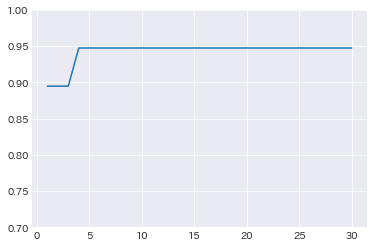

In [48]:
plt.plot(i_range, scores)
plt.ylim(0.7,1)

In [53]:
i_range[np.argmax(scores)]

4

In [52]:
clf.fit(X_train_pca[:, 0:4], y_train)
clf.score(X_test_pca[:, 0:4], y_test)

0.94736842105263153

In [54]:
from sklearn.preprocessing import PolynomialFeatures

degree 1: $x_1, x_2, x_3$

degree 2: $x_1 x_2, x_1 x_3, x_2 x_3$

degree 3: $x_1 x_2 x_3$

degree 1: $x_1, x_2, x_3, x_4$

degree 2: $x_1 x_2, x_1 x_3, x_1 x_4, x_2 x_3, x_2 x_4, x_3 x_4$

degree 3: $x_1 x_2 x_3, x_1 x_2 x_4, x_1 x_3 x_4, x_2 x_3 x_4$

degree 4: $x_1 x_2 x_3 x_4$

In [55]:
polf = PolynomialFeatures(degree=2)

In [56]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [57]:
X_train_poly = polf.transform(X_train)
X_test_poly  = polf.transform(X_test)

In [58]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [59]:
# PolynomialFeaturesの補足
# if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
# つまり次元数を増やす操作をしてやる。
pf = PolynomialFeatures(degree=2)
pf.fit_transform(np.arange(6).reshape(3, 2))

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

In [60]:
np.arange(6).reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [61]:
X_test.shape, X_test_poly.shape

((114, 30), (114, 496))

In [62]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.94736842105263153

In [63]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94736842105263153

In [64]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

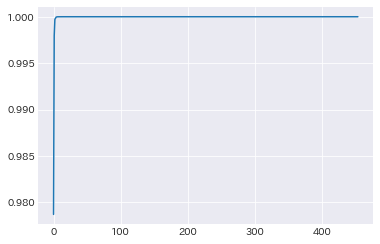

In [65]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_)) # 次元を増やしたが、ほとんどがいらない情報なのがわかる。

In [66]:
n_features = X_train_poly.shape[1]
n_features

496

In [67]:
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca  = pca.transform(X_test_poly)

for i in i_range:

    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    
    scores.append( clf.score(X_test_poly_pca[:, 0:i],
                             y_test) )

scores = np.array(scores)

In [68]:
scores

array([ 0.87719298,  0.95614035,  0.96491228,  0.96491228,  0.95614035,
        0.96491228,  0.96491228,  0.94736842,  0.96491228,  0.94736842,
        0.96491228,  0.95614035,  0.95614035,  0.94736842,  0.96491228,
        0.96491228,  0.96491228,  0.96491228,  0.94736842,  0.96491228,
        0.96491228,  0.96491228,  0.96491228,  0.95614035,  0.95614035,
        0.96491228,  0.94736842,  0.96491228,  0.95614035,  0.96491228,
        0.96491228,  0.96491228,  0.94736842,  0.96491228,  0.95614035,
        0.94736842,  0.94736842,  0.96491228,  0.94736842,  0.95614035,
        0.95614035,  0.96491228,  0.96491228,  0.95614035,  0.94736842,
        0.96491228,  0.96491228,  0.96491228,  0.96491228,  0.96491228])

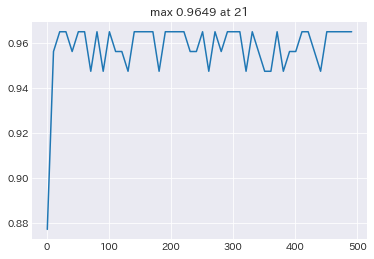

In [69]:
plt.plot(i_range, scores);
plt.title("max {0:.4f} at {1}".format(scores.max(), 
                                      i_range[np.argmax(scores)]))

d= 2
max dimension:  496
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 3
max dimension:  5456
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 4
max dimension:  46376
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,


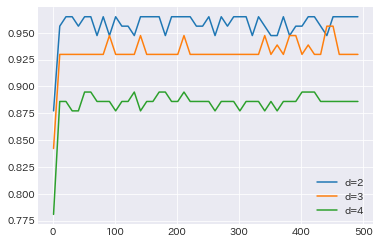

In [70]:
for d in [2, 3, 4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly  = polf.transform(X_test)

    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca  = pca.transform(X_test_poly)
    
    scores = []
    n_features = min(500, X_train_poly.shape[1]) # あまりに次元を増やすとfor文が大変なので、500で打ち切る
    i_range = range(1, n_features, 10)
    
    print("max dimension: ", X_train_poly.shape[1])

    print("i=", end="")
    for i in i_range:
        print(i, end=",") # 今、第i主成分を使っているかを表示
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append( clf.score(X_test_poly_pca[:, 0:i], y_test) )
    print("")
    
    scores = np.array(scores)
    plt.plot(i_range, scores, label="d={0}".format(d))

plt.legend();

In [71]:
scores

array([ 0.78070175,  0.88596491,  0.88596491,  0.87719298,  0.87719298,
        0.89473684,  0.89473684,  0.88596491,  0.88596491,  0.88596491,
        0.87719298,  0.88596491,  0.88596491,  0.89473684,  0.87719298,
        0.88596491,  0.88596491,  0.89473684,  0.89473684,  0.88596491,
        0.88596491,  0.89473684,  0.88596491,  0.88596491,  0.88596491,
        0.88596491,  0.87719298,  0.88596491,  0.88596491,  0.88596491,
        0.87719298,  0.88596491,  0.88596491,  0.88596491,  0.87719298,
        0.88596491,  0.87719298,  0.88596491,  0.88596491,  0.88596491,
        0.89473684,  0.89473684,  0.89473684,  0.88596491,  0.88596491,
        0.88596491,  0.88596491,  0.88596491,  0.88596491,  0.88596491])

In [ ]:
# 以下講義に関係ない
lam = np.identity(3)
lam

In [ ]:
u = np.arange(18).reshape(6,3)
u

In [ ]:
v = np.arange(9).reshape(3,3)
v

In [ ]:
x = np.dot(u, lam)
x = np.dot(x, v)
np.linalg.matrix_rank(x)

In [ ]:
x

In [ ]:
286/79

In [ ]:
493/79

In [ ]:
907